В цьому домашньому завданні ми з вами побудуємо повноцінне ML-рішення реальної ML-задачі. Ви вже маєте всі знання, які для цього потрібні. Дотримуйтесь інструкцій, та користуйтесь матеріалами лекцій, аби виконувати завдання. Тут інструкції будуть детальні, а в подільших завданнях - будуть ставати все менш детальними, аби ви вже починали самостійно структурувати ML-проєкт і до кінця курсу для вас розвʼязати будь-яку ML–задачу було eazy-breezy.

## Dataset

Будемо працювати з набором даних `cars.csv`, який описує автомобілі і їх ціну у індійських рупіях :) Мета - передбачити ціну авто за його характеристиками. Опис набору даних:

| Назва рядка            | Опис                                                                                                                                                 |
|------------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------|
| Car_ID                 | Унікальний ідентифікатор для кожного оголошення про автомобіль.                                                                                         |
| Brand                  | Бренд або виробник автомобіля (наприклад, Toyota, Honda, Ford тощо).                                                                                     |
| Model                  | Модель автомобіля (наприклад, Camry, Civic, Mustang тощо).                                                                                               |
| Year                   | Рік виготовлення автомобіля.                                                                                                                            |
| Kilometers_Driven      | Загальний пробіг автомобіля у кілометрах.                                                                                                               |
| Fuel_Type              | Тип палива, який використовує автомобіль (наприклад, бензин, дизель, електро тощо).                                                                      |
| Transmission           | Тип трансмісії автомобіля (наприклад, механічна, автоматична).                                                                                           |
| Owner_Type             | Кількість попередніх власників автомобіля (наприклад, перший, другий, третій).                                                                           |
| Mileage                | Паливна ефективність автомобіля у кілометрах на літр.                                                                                                   |
| Engine                 | Об'єм двигуна автомобіля в кубічних сантиметрах (CC).                                                                                                   |
| Power                  | Максимальна потужність автомобіля в кінських силах (bhp).                                                                                               |
| Seats                  | Кількість місць в автомобілі.                                                                                                                           |
| Price                  | Вартість автомобіля в INR (індійські рупії), що є цільовою змінною для прогнозування.                                                                   |

# Імпорти

Для зручності рекомендую всі імпорти розмістити тут нагорі, аби коли ви перезавантажували ноутбук, одразу можна було в один запуск клітинки імпортувати всі потрібні бібліотеки.

In [691]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

# Знайомство з даними

**Завдання 1.** Завантажте набір даних `cars.csv` в pandas.DataFrame. Виведіть перші 5 записів.

In [964]:
cars_df = pd.read_csv('cars.csv')

In [965]:
cars_df.head()

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,1,Toyota,Corolla,2018,50000,Petrol,Manual,First,15,1498,108,5,800000
1,2,Honda,Civic,2019,40000,Petrol,Automatic,Second,17,1597,140,5,1000000
2,3,Ford,Mustang,2017,20000,Petrol,Automatic,First,10,4951,395,4,2500000
3,4,Maruti,Swift,2020,30000,Diesel,Manual,Third,23,1248,74,5,600000
4,5,Hyundai,Sonata,2016,60000,Diesel,Automatic,Second,18,1999,194,5,850000


**Завдання 2.** Виведіть типи даних колонок даних, а також дослідіть, які по факту типи даних мають записи в кожній колонці (тип `object` може містити різні типи даних) і скільки значень є в кожній категоріальній колонці.

Напишіть висновок, скільки в наборі даних числових та категоріальних колонок кожного з трьох різних типів (бінарна, мільтикатегоріальна без порядку, мультикатегоріальна з порядком). Шаблон висновку

```
В наборі даних 10 числових і 10 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 6 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 2 колонки, в яких можна встановити відношення порядку (наприклад Small<Medium<Large)
```

Якщо не знаєте, як це зробити з `pandas` - ось підказка, які методи можуть допомогти вам виконати це завдання

- pandas.DataFrame.info()
- pandas.DataFrame.dtypes
- pandas.DataFrame.loc[...]
- pandas.DataFrame.select_dtypes(...)
- pandas.Series.unique()
- pandas.Series.nunique()

Детальніше ознайомитись з кожним ви можете в [документації](https://pandas.pydata.org/docs/reference/frame.html), або написати в окремій клітинці знак питання і назву методу (тільки приберіть це перед здачею, бо перегляд документації - не допомагає зрозуміти дані і хід думок, а Ваша робота - це як презентація замовнику зробленої задачі).


In [968]:
# приклад як викликати документацію, якщо у Вас pandas імпортований як pd
?pd.DataFrame.info

Signature:
pd.DataFrame.info(
    self,
    verbose: 'bool | None' = None,
    buf: 'WriteBuffer[str] | None' = None,
    max_cols: 'int | None' = None,
    memory_usage: 'bool | str | None' = None,
    show_counts: 'bool | None' = None,
) -> 'None'
Docstring:
Print a concise summary of a DataFrame.

This method prints information about a DataFrame including
the index dtype and columns, non-null values and memory usage.

Parameters
----------
verbose : bool, optional
    Whether to print the full summary. By default, the setting in
    ``pandas.options.display.max_info_columns`` is followed.
buf : writable buffer, defaults to sys.stdout
    Where to send the output. By default, the output is printed to
    sys.stdout. Pass a writable buffer if you need to further process
    the output.
max_cols : int, optional
    When to switch from the verbose to the truncated output. If the
    DataFrame has more than `max_cols` columns, the truncated output
    is used. By default, the setting in


In [969]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Car_ID             100 non-null    int64 
 1   Brand              100 non-null    object
 2   Model              100 non-null    object
 3   Year               100 non-null    int64 
 4   Kilometers_Driven  100 non-null    int64 
 5   Fuel_Type          100 non-null    object
 6   Transmission       100 non-null    object
 7   Owner_Type         100 non-null    object
 8   Mileage            100 non-null    int64 
 9   Engine             100 non-null    int64 
 10  Power              100 non-null    int64 
 11  Seats              100 non-null    int64 
 12  Price              100 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 10.3+ KB


In [970]:
cars_df.dtypes

Car_ID                int64
Brand                object
Model                object
Year                  int64
Kilometers_Driven     int64
Fuel_Type            object
Transmission         object
Owner_Type           object
Mileage               int64
Engine                int64
Power                 int64
Seats                 int64
Price                 int64
dtype: object

In [971]:
for col in cars_df.columns:
    print(col, cars_df[col].apply(type).unique())

Car_ID [<class 'int'>]
Brand [<class 'str'>]
Model [<class 'str'>]
Year [<class 'int'>]
Kilometers_Driven [<class 'int'>]
Fuel_Type [<class 'str'>]
Transmission [<class 'str'>]
Owner_Type [<class 'str'>]
Mileage [<class 'int'>]
Engine [<class 'int'>]
Power [<class 'int'>]
Seats [<class 'int'>]
Price [<class 'int'>]


In [972]:
cat_df = cars_df.select_dtypes(include = "object")
cat_df.nunique()

Brand           11
Model           58
Fuel_Type        2
Transmission     2
Owner_Type       3
dtype: int64

In [973]:
for col in cat_df.columns:
    print(col, cat_df[col].unique())

Brand ['Toyota' 'Honda' 'Ford' 'Maruti' 'Hyundai' 'Tata' 'Mahindra' 'Volkswagen'
 'Audi' 'BMW' 'Mercedes']
Model ['Corolla' 'Civic' 'Mustang' 'Swift' 'Sonata' 'Nexon' 'Scorpio' 'Polo'
 'A4' 'X1' 'C-Class' 'Endeavour' 'Creta' 'Harrier' 'Ertiga' 'City'
 'Tiguan' 'Q3' '5 Series' 'GLC' 'Innova' 'Figo' 'Verna' 'Altroz' 'Thar'
 'Passat' 'A6' 'X3' 'E-Class' 'Fortuner' 'Aspire' 'Elantra' 'Safari'
 'Vitara' 'WR-V' 'Ameo' 'A3' '7 Series' 'GLE' 'Yaris' 'Ranger' 'Santro'
 'Tigor' 'S-Cross' 'BR-V' 'T-Roc' 'Q7' 'X5' 'GLA' 'Camry' 'Venue' 'Tiago'
 'XUV300' 'Vento' 'A5' '3 Series' 'Innova Crysta' 'EcoSport']
Fuel_Type ['Petrol' 'Diesel']
Transmission ['Manual' 'Automatic']
Owner_Type ['First' 'Second' 'Third']


Всьго в датафреймi 13 колонок, 100 рядкiв. В даних пропущених значень немає. Числовi колонки мiстять цiлi числа, категорiальнi мiстять текстовi данi типу string.

В наборі даних 8 числових і 5 категоріальних колонок з них
- 2 бінарні (мають лише 2 значення)
- 2 мультикатегоріальних (більше 2х значень) зі значеннями, для яких немає відношення порядку
- 1 колонка, в якiй можна встановити відношення порядку (First < Second < Third)

**Завдання 3**. Розділіть дані на тренувальні і тест. Відведіть в тест 20%, поставте `random_state=12`. Ми будемо передбачати колонку `Price` - тож, вона є цільовою змінною. В результаті у Вас має бути 4 набори даних `X_train, X_test, y_train, y_test`.

Надалі ми всюди тренуємо методи для кодування, масштабування та саму модель тільки на тренувальних даних X_train (та y_train для моделі), а на тестувальних лише використовуємо вже навчені методи для кодування, масштабування і модель викликаючи в них `transform()` (для методів обробки даних) або `predict()` (для моделі).

І так само треба робити завжди.

In [983]:
X = cars_df.drop('Price', axis=1)
y = cars_df.Price

In [984]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

**Завдання 4**. Кодуємо категоріальні колонки.

1. Закодуйте колонки з бінарними значеннями `Fuel_Type` і `Transmission` так, аби вони були у чисельному представленні і містили лише 0 так 1. Приклад був у лекції. Значення 1 нехай буде у категорії, яка містить більше значень в колонці.

2. Закодуйте колонку `Brand` з використанням `sklearn.preprocessing.OneHotEncoder` аналогічно до того, як ми робили це в лекції. Увага! Ми робимо виклик методу `Encoder.fit()` на тренувальних даних `X_train`, а на тестувальних тільки викликаємо `Encoder.transform()`. Додайте закодовані значення в набори даних `X_train`, `X_test`.

3. Колонку `Owner_Type` з використанням `sklearn.preprocessing.OrdinalEncoder` я закодую для вас. Проаналізуйте, що відбувається.

Колонка `Model` містять забагато значень для кодування в тому вигляді, як вона є зараз, з огляду на невелику кількість даних. Якщо ви бачите, як можна згрупувати значення в цій колонці скоротивши кількість унікальних значень до 3-5, то можете виконати ще цю трансформацію, використати цю колонку в моделі і отримати додаткову практику і бал, якщо все буде зроблено правильно. А якщо неправильно - то фідбек на Вашу роботу :)

#### 1. `Fuel_Type` і `Transmission`

In [989]:
X_train.Fuel_Type.value_counts()

Fuel_Type
Petrol    41
Diesel    39
Name: count, dtype: int64

In [991]:
Fuel_Type_codes = {'Petrol': 1, 'Diesel': 0}
X_train['Fuel_Type_Codes'] = X_train.Fuel_Type.map(Fuel_Type_codes)
X_test['Fuel_Type_Codes'] = X_test.Fuel_Type.map(Fuel_Type_codes)

In [993]:
X_train.Transmission.value_counts()

Transmission
Automatic    49
Manual       31
Name: count, dtype: int64

In [995]:
Transmission_codes = {'Automatic': 1, 'Manual': 0}
X_train['Transmission_Codes'] = X_train.Transmission.map(Transmission_codes)
X_test['Transmission_Codes'] = X_test.Transmission.map(Transmission_codes)

#### 2. `Brand`

In [998]:
enc = preprocessing.OneHotEncoder()
enc.fit(X_train[['Brand']])

OneHotEncoder()

In [1000]:
one_hot_train = enc.transform(X_train[['Brand']]).toarray()
X_train[enc.categories_[0]] = one_hot_train

In [1002]:
one_hot_test = enc.transform(X_test[['Brand']]).toarray()
X_test[enc.categories_[0]] = one_hot_test

#### 3. 'Owner_Type'

In [1004]:
from sklearn.preprocessing import OrdinalEncoder

ordenc = OrdinalEncoder(categories=[['First', 'Second', 'Third']]) # визначаємо порядок категорій
ordenc.fit(X_train[['Owner_Type']])

X_train['Owner_Type_Codes'] = ordenc.transform(X_train[['Owner_Type']])
X_test['Owner_Type_Codes'] = ordenc.transform(X_test[['Owner_Type']])

Очікуваний результат після трансформацій:

In [1007]:
pd.set_option('display.max_columns', 100)
display(X_train.head()), display(X_test.head())

,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
83,84,Volkswagen,T-Roc,2019,22000,Petrol,Automatic,Second,18,1498,148,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
55,56,Audi,A5,2018,28000,Diesel,Automatic,First,17,1968,187,5,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26,27,Audi,A6,2018,28000,Petrol,Automatic,First,15,1984,241,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,55,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
19,20,Mercedes,GLC,2017,26000,Petrol,Automatic,Second,12,1991,241,5,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


,Car_ID,Brand,Model,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes
17,18,Audi,Q3,2016,38000,Petrol,Automatic,Second,15,1395,148,5,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
41,42,Hyundai,Santro,2019,26000,Petrol,Manual,Third,20,1086,68,5,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
92,93,Volkswagen,Vento,2017,32000,Petrol,Manual,Second,18,1598,103,5,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
14,15,Maruti,Ertiga,2020,18000,Petrol,Manual,First,19,1462,103,7,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
68,69,Ford,Aspire,2019,26000,Petrol,Manual,Third,20,1194,94,5,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


(None, None)

OrdinalEncoder дає можливiсть встановити відношення порядку - кодує значення вiд 0 до 2 в нашому випадку поставивши у вiдповiднiсть 0 для найменшої кількостi попередніх власників автомобіля: одного, 1 - для двох власникiв, 2 - для трьох.

**Завдання 5.** Оберіть лише числові колонки з `X_train` (можна для цього використати `pandas.select_dtypes(...)` або видалити всі НЕчислові дані, вони нам вже не потрібні), обʼєднайте ці дані з `y_train` (зручно з `pandas.concat([df1, df2], axis=1)`), побудуйте для цих даних матрицю кореляції і проаналізуйте її. Напишіть висновок, які колонки корелюють з цільовою змінною на більш ніж 0.5 за модулем (може бути як позитивна, так і негативна кореляція).

In [1011]:
X_train = X_train.select_dtypes(include = "number")
data_train = pd.concat([X_train, y_train], axis=1)

In [1013]:
corr_data = data_train.corr()
corr_data.head()

,Car_ID,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Fuel_Type_Codes,Transmission_Codes,Audi,BMW,Ford,Honda,Hyundai,Mahindra,Maruti,Mercedes,Tata,Toyota,Volkswagen,Owner_Type_Codes,Price
Car_ID,1.000000,0.137027,-0.356614,0.100891,-0.089284,-0.006319,-0.063793,0.090537,-0.084381,0.089473,0.048335,-0.020240,-0.050809,0.016831,0.006797,-0.054463,-0.045431,-0.032926,0.011350,0.020129,0.038923,0.025560
Year,0.137027,1.000000,-0.708525,0.278559,-0.392764,-0.248442,-0.278755,0.248515,-0.200603,-0.256523,0.202517,-0.150454,-0.037437,-0.092099,0.181669,0.285094,-0.115157,0.248715,-0.219346,0.018255,-0.014499,-0.233769
Kilometers_Driven,-0.356614,-0.708525,1.000000,-0.126621,0.101219,-0.060803,0.403656,-0.332351,-0.066491,0.095879,-0.247042,-0.009761,0.057372,0.154362,-0.040344,-0.190420,-0.091731,0.030399,0.368519,-0.137675,-0.001772,-0.083951
Mileage,0.100891,0.278559,-0.126621,1.000000,-0.710516,-0.684705,-0.178619,-0.070112,-0.399164,-0.152701,-0.134105,-0.296480,0.358630,0.217406,0.029427,0.116389,-0.238489,0.347678,-0.201565,0.085114,0.026624,-0.638404
Engine,-0.089284,-0.392764,0.101219,-0.710516,1.000000,0.801638,0.167326,-0.174455,0.456296,0.085153,0.287119,0.184231,-0.154491,-0.182213,-0.024973,-0.193257,0.163871,-0.340051,0.234889,-0.165115,-0.196106,0.710561


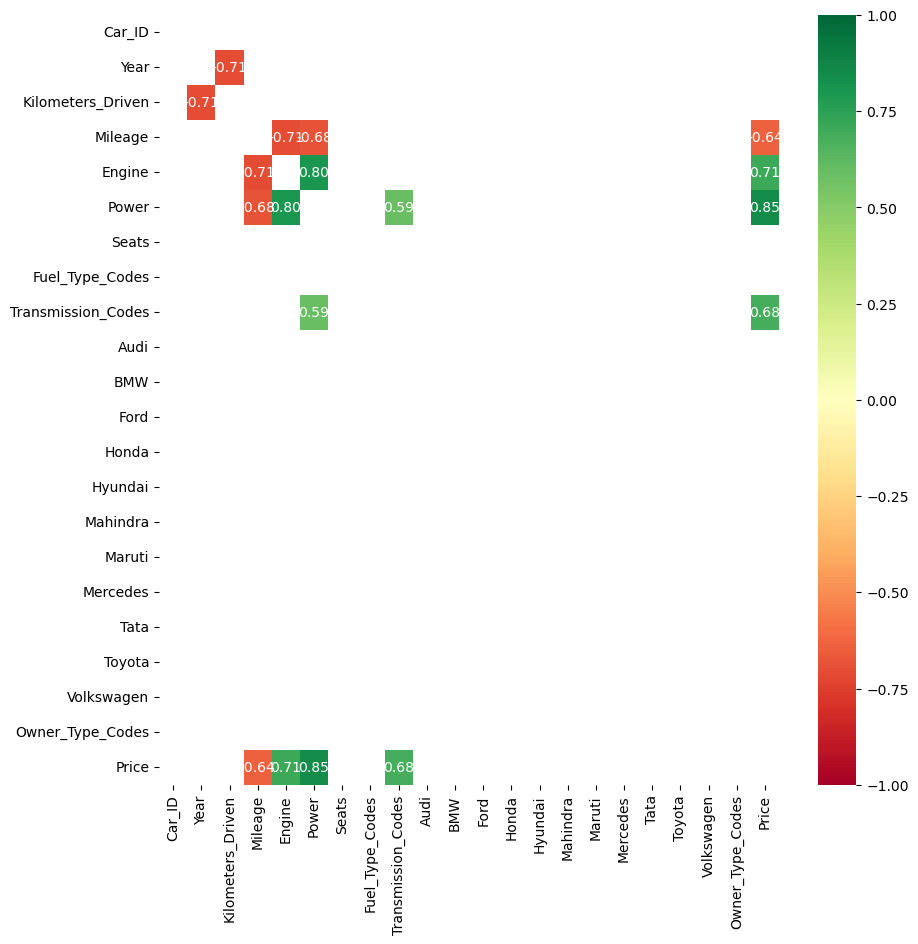

In [1020]:
plt.figure(figsize = (10,10))
sns.heatmap(data = corr_data[((corr_data >= 0.5) & (corr_data < 0.99)) | ((corr_data <= -0.5) & (corr_data > -0.99))], annot = True, cmap = "RdYlGn", cbar = True, fmt='.2f',vmin=-1, vmax=1)
plt.show()

In [1021]:
abs_corr_data = abs(corr_data)
corr_data[(abs_corr_data >= 0.5) & (abs_corr_data <= 0.99)].unstack().sort_values(ascending = False).head(20)

Price               Power                 0.849137
Power               Price                 0.849137
                    Engine                0.801638
Engine              Power                 0.801638
                    Price                 0.710561
Price               Engine                0.710561
Transmission_Codes  Price                 0.680731
Price               Transmission_Codes    0.680731
Power               Transmission_Codes    0.586910
Transmission_Codes  Power                 0.586910
Mileage             Price                -0.638404
Price               Mileage              -0.638404
Power               Mileage              -0.684705
Mileage             Power                -0.684705
Kilometers_Driven   Year                 -0.708525
Year                Kilometers_Driven    -0.708525
Engine              Mileage              -0.710516
Mileage             Engine               -0.710516
Car_ID              Car_ID                     NaN
                    Year       

Дивлячись на вiзуалiзацiю та наведену вище таблицю і видаляючи дублі, ми маємо 9 кореляцій, бiльших за 0.5 за модулем:
 - Price               Power                 0.849137
 - Engine              Power                 0.801638
 - Engine              Price                 0.710561
 - Engine              Mileage               -0.710516
 - Kilometers_Driven   Year                  -0.708525
 - Power               Mileage               -0.684705
 - Transmission_Codes  Price                 0.680731
 - Mileage             Price                 -0.638404
 - Transmission_Codes  Power                 0.586910

Жодна з пар, що не мiстить Price, не має значення бiльше за умовне 0.95, тому не потребує видалення однiєї з колонок.

Також з вiзуалiзацiї бачимо що присутнi негативнi кореляції, наприклад Kilometers_Driven та Year: чим бiльше Year - тобто чим новiший автомобiль, тим менший пробiг.

Колонки, що корелюють з цільовою змінною на більш ніж 0.5 за модулем:

 - Power               Price                 0.849137
 - Engine              Price                 0.710561
 - Transmission_Codes  Price                 0.680731
 - Mileage             Price                 -0.638404

Цi колонки найвпливовiшi для передбачення цільової змінної дивлячись на кореляцiї.

**Завдання 6**. Тренуємо лінійну регресію.
0. Видаліть усі НЕчислові колонки з `X_train`, `X_test`, якщо ще цього не зробили.
1. Натренуйте лінійну регресую з `sklearn` на усіх числових даних тренувального набору `X_train`.
2. Зробіть передбачення на  `X_train`, `X_test`. Знайдіть і виведіть root mean squared error відхилення передбачення від справжніх значень цільової змінної.
3. Побудуйте графік розсіювання передбачень проти реальних даних цільової змінної для тренувального і тестувального наборів даних. Що можете сказати про якість моделі?

In [1026]:
X_test = X_test.select_dtypes(include = "number")

In [1028]:
model = LinearRegression().fit(X_train, y_train)

In [1030]:
predictions_train = model.predict(X_train)
predictions_test = model.predict(X_test)

In [1032]:
rmse_train = root_mean_squared_error(y_train, predictions_train)
print('RMSE train: ', rmse_train)

rmse_test = root_mean_squared_error(y_test, predictions_test)
print('RMSE test: ', rmse_test)

RMSE train:  210293.5782815184
RMSE test:  258181.56112032934


In [1034]:
np.mean(y_train), np.std(y_train), np.min(y_train)

(1680000.0, 1033882.2466799592, 450000)

Дивлячись на статистичнi значення цiльової змiнної, RMSE значення виглядають адекватно.

Також цiкаво подивитись на метрику R², гарнi результати; на test значення очiкувано нижче, оскiльки присутнi закономiрностi на яких модель не навчалась.

In [1037]:
r2 = r2_score(y_train, predictions_train)
print(f"R² score train: {r2:.2f}")

r2 = r2_score(y_test, predictions_test)
print(f"R² score test: {r2:.2f}")

R² score train: 0.96
R² score test: 0.85


####  Графік розсіювання

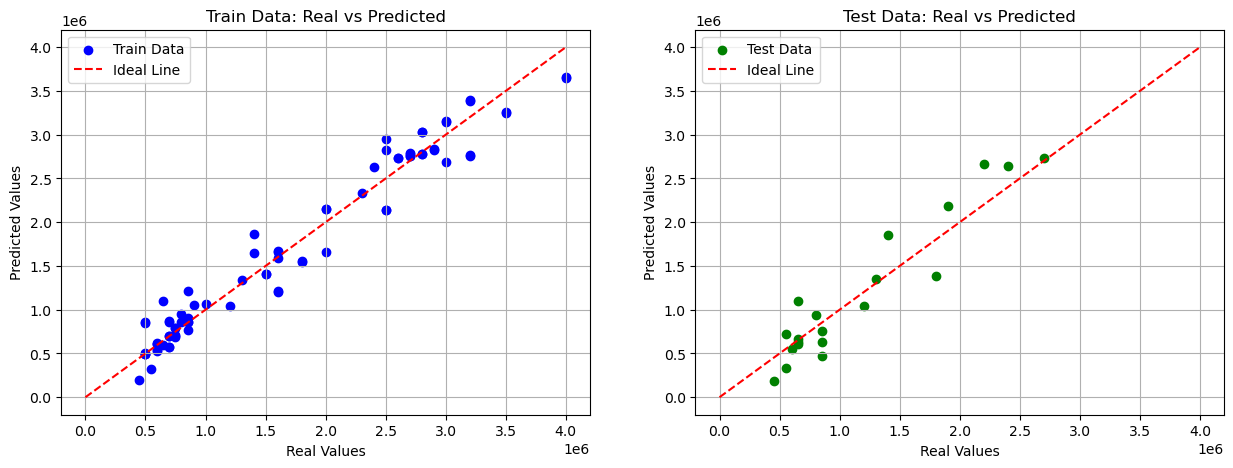

In [1039]:
plt.figure(figsize = (15,5))

# Тренувальнi данi
plt.subplot(1, 2, 1)
plt.scatter(y_train, predictions_train, color='blue', label='Train Data')
plt.plot([0, 4000000], [0, 4000000], color='red', linestyle='--', label='Ideal Line')
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Train Data: Real vs Predicted")
plt.legend()
plt.grid()

# Тестовi данi
plt.subplot(1, 2, 2)
plt.scatter(y_test, predictions_test, color='green', label='Test Data')
plt.plot([0, 4000000], [0, 4000000], color='red', linestyle='--', label='Ideal Line')
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Test Data: Real vs Predicted")
plt.legend()
plt.grid()
plt.show()

В iдеалi точки мають лежати на train та test на прямiй Real = Predicted. В нашому випадку точки розташованi вздовж цiєї прямої та зосередженi досить близько до неї, що свiдчить про гарнi передбачення моделi на train та test.

**Завдання 7**. Ми хочемо проаналізувати як впливає кожен чинник на цілову змінну. Для цього давайте промасштабуємо наші дані.
1. Зробіть масштабування незалежних змінних використовуючи `StandardScaler`. Тренуємо на тренувальних даних, а на тестувальних лише викликаємо `transform`.

2. Натренуйте модель на відмасштабованих даних і перегляньте коефіцієнти моделі. Які колонки є найвпливовішими на формування передбачення з точки зору коефіцієнтів? Проаналізуйте напрям дії найважливіших коефіцієнтів. Чи це логічно з точки зору значення відповідних змінних, що вони впливають на цільову змінну саме в напрямі збільшення / зменшення?

In [1053]:
numeric_cols = ['Car_ID', 'Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats']
scaler = StandardScaler()
scaler.fit(X_train[numeric_cols])

StandardScaler()

In [1055]:
X_train_scaled = scaler.transform(X_train[numeric_cols])
X_test_scaled = scaler.transform(X_test[numeric_cols])

In [1056]:
cat_cols = ['Fuel_Type_Codes', 'Transmission_Codes', 'Audi', 'BMW', 'Ford',
        'Honda', 'Hyundai', 'Mahindra', 'Maruti', 'Mercedes', 'Tata', 'Toyota',
       'Volkswagen', 'Owner_Type_Codes']
cat_train = X_train[cat_cols].values
cat_test = X_test[cat_cols].values

In [1059]:
X_train_scaled = np.concatenate((X_train_scaled, cat_train), axis=1)
X_test_scaled = np.concatenate((X_test_scaled, cat_test), axis=1)

In [1061]:
model_scaled = LinearRegression().fit(X_train_scaled, y_train)

In [1063]:
column_names = numeric_cols + cat_cols

In [1065]:
weights_df = pd.DataFrame({
    'feature': np.append(column_names, 1),
    'weight': np.append(model_scaled.coef_, model_scaled.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
21,1,1.601956e+06
9,Audi,7.569974e+05
16,Mercedes,7.364157e+05
10,BMW,7.312208e+05
5,Power,4.967692e+05
8,Transmission_Codes,2.395294e+05
18,Toyota,1.243492e+05
20,Owner_Type_Codes,6.476399e+04
0,Car_ID,5.608685e+03
6,Seats,-2.148925e+03


Найвпливовішими на формування передбачення з точки зору коефіцієнтів є:

- Audi	7.569974e+05
- Mercedes	7.364157e+05
- BMW	7.312208e+05
- Mahindra	-5.750372e+05
- Hyundai	-5.065820e+05
- Power	4.967692e+05

Напрям коефiцiєнтiв є цiлком логiчним: якщо автомобiль премiальний (Audi, Mercedes, BMW) то цiна зростає, а якщо середнього класу (Mahindra, Hyundai) то цiна нижча. Також логiчно що чим бiльша потужність автомобіля тим вища цiна.

**Завдання 8.** На тих самих відмасштабованих даних натренуйте модель з `statsmodels`. Виведіть звіт і проаналізуйте p-value коефіцієнтів. Які ознаки є стат значущими на рівні значущості 0.05? Напишіть їх список.

**Завдання 9**. Натренуйте лінійну регресію з `statsmodels` тільки на ознаках, які виявлись стат. значущими в попередньому завданні. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared?

**Завдання 10**. Натренуйте лінійну регресію з `statsmodels` на усіх ознаках з масштабованого `X_train`, у яких p_value в завданні 7 менше за `0.25`. Ми таким чином помʼякшили критерій відбору ознак. Проаналізуйте показники моделі. Чи значно змінились R2 і Adj. R-squared порівняно з завданням 7? Яку модель з останніх 3х завдань ви б лишили для використання?